# Определение стоимости автомобилей

## Цель исследования:
Построить модель для определения стоимости автомобилей с пробегом. Модель должна показывать высокое качество предсказания, высокую скорость предсказания и малое количество времени обученя.


## Ход исследования:
1. Обзор данных. На этом этапе будет проведены обзор и оценка качества данных.
2. Предобработка данных. На этом этапе будет осуществлена проверка данных на ошибки и оценка их влияние на исследование. По-возможности исправление критичных ошибок данных.
3. Обучение моделей. Перед нами стоит задача регрессии – прогноз на основе выборки объектов с различными признаками. На выходе должно получиться вещественное число - стоимость автомобиля. Для решения задачи будут обучены модели на основании алгоритмов:
- Линейной регрессии;
- CatBoost;
- Дерево принятия решений;
~- Случайный лес;~
- LightGBM.
4. Анализ моделей. Наданном этапе будем анализировать время обучения моделей и время предсказания моделей. На основе полученных данных будет предложена лучшая модель обучения для выполнения поставленной задачи.


## Описание данных:
Данные о технических характеристиках, комплектации и ценах других автомобилей.


Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя


Целевой признак
- Price — цена (евро)


Примечание

Для оценки качества моделей применять метрику RMSE. Значение метрики RMSE должно быть меньше 2500.


## Обзор данных

Создадим пространство для работы.

In [1]:
!pip install yellowbrick

In [2]:
!pip install pandas-profiling

In [3]:
!pip install seaborn

In [4]:
!pip install missingno


In [5]:
!pip install lightgbm

In [6]:
import pandas as pd
import numpy as np
from yellowbrick.classifier import ClassificationReport
import pandas_profiling
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


import missingno as msno

Ознакомимся с файлом и проанализируем его.

In [7]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')
df.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
58788,2016-03-07 21:51:53,6900,coupe,2005,auto,272,other,150000,6,petrol,mercedes_benz,yes,2016-03-07 00:00:00,0,38120,2016-03-13 02:17:13
72787,2016-03-09 23:56:14,800,small,1997,NaN,60,NaN,100000,12,NaN,opel,NaN,2016-03-09 00:00:00,0,36179,2016-03-12 07:15:22
150862,2016-03-15 15:53:17,1950,sedan,1997,manual,193,a6,150000,7,petrol,audi,no,2016-03-15 00:00:00,0,42275,2016-04-06 08:16:09
239366,2016-03-29 15:47:37,1950,small,2006,manual,65,picanto,90000,6,petrol,kia,no,2016-03-29 00:00:00,0,79117,2016-04-06 01:44:32
50210,2016-03-07 12:52:03,2650,suv,1994,auto,190,grand,150000,0,lpg,chrysler,NaN,2016-03-07 00:00:00,0,32758,2016-03-15 11:15:30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [10]:
df.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [11]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<AxesSubplot:>

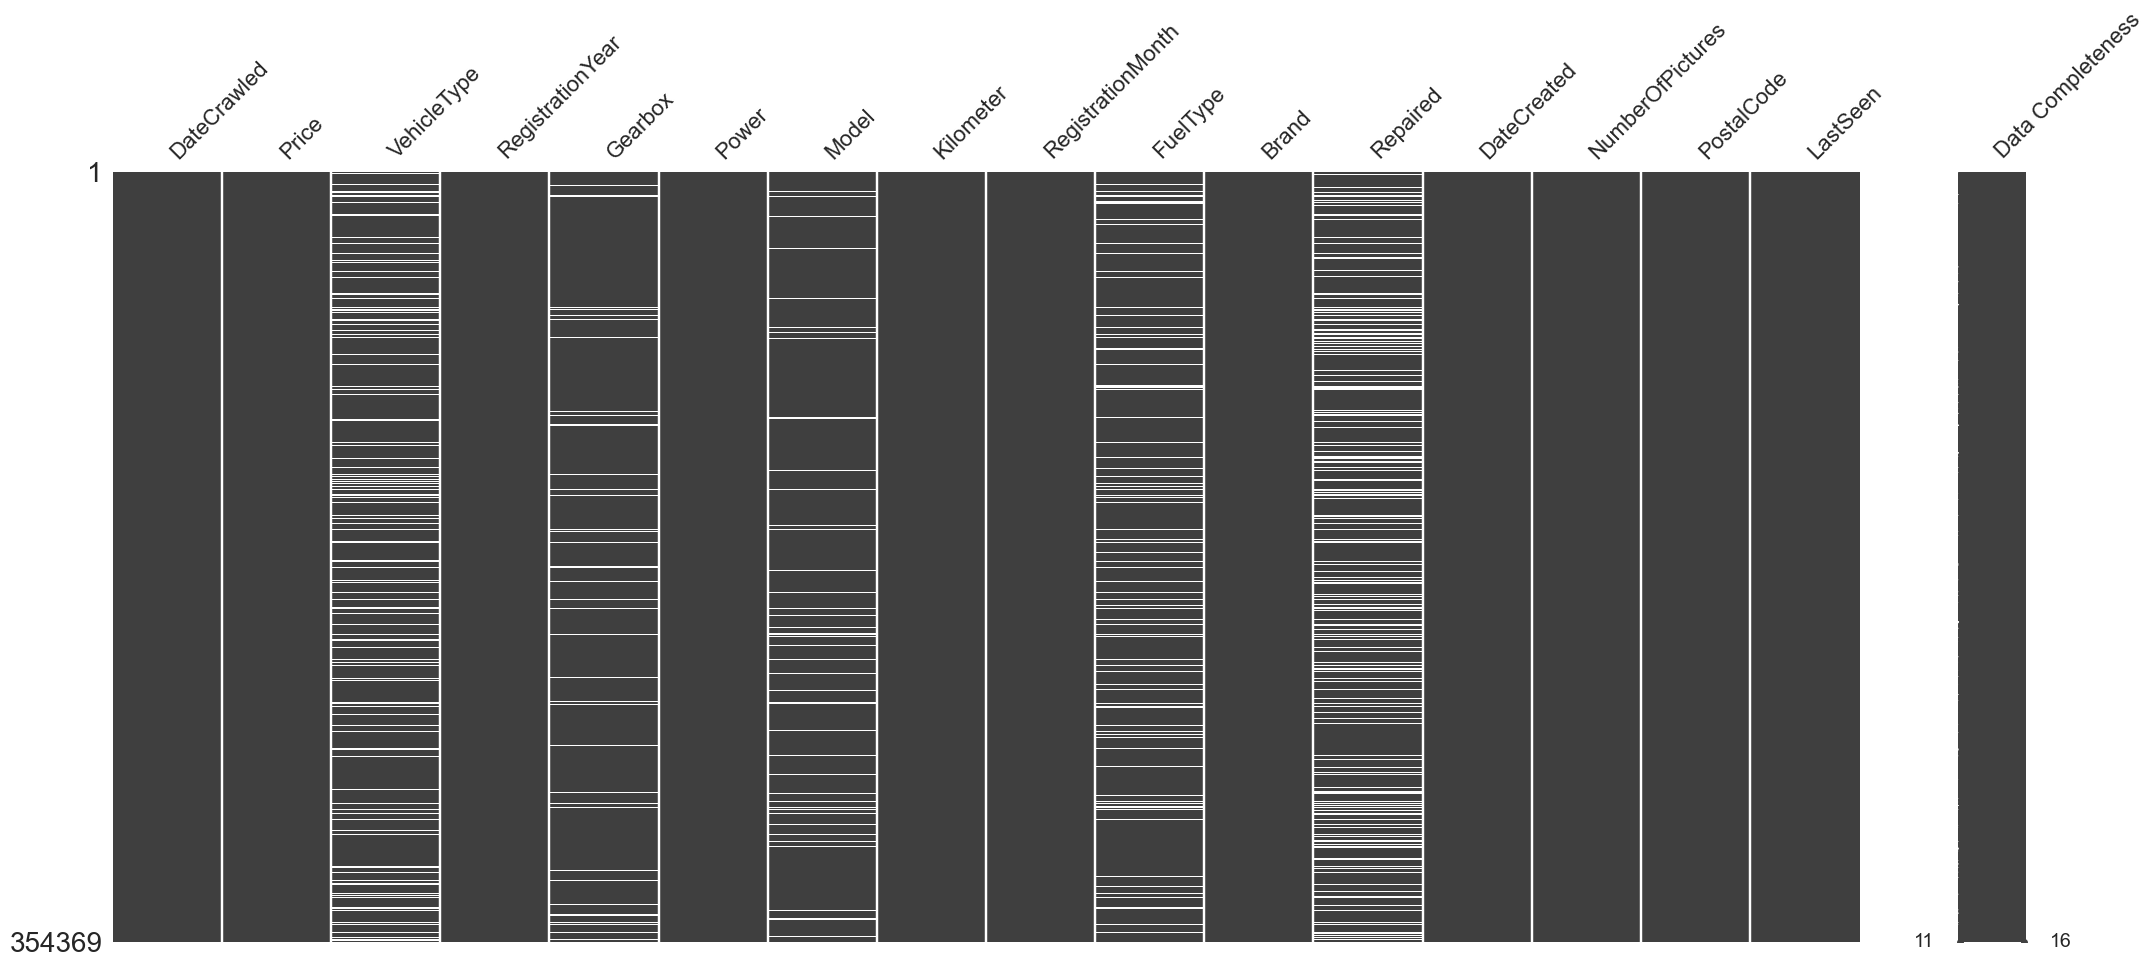

In [12]:
msno.matrix(df, labels=True)#визуальная обработка пропущенных значений

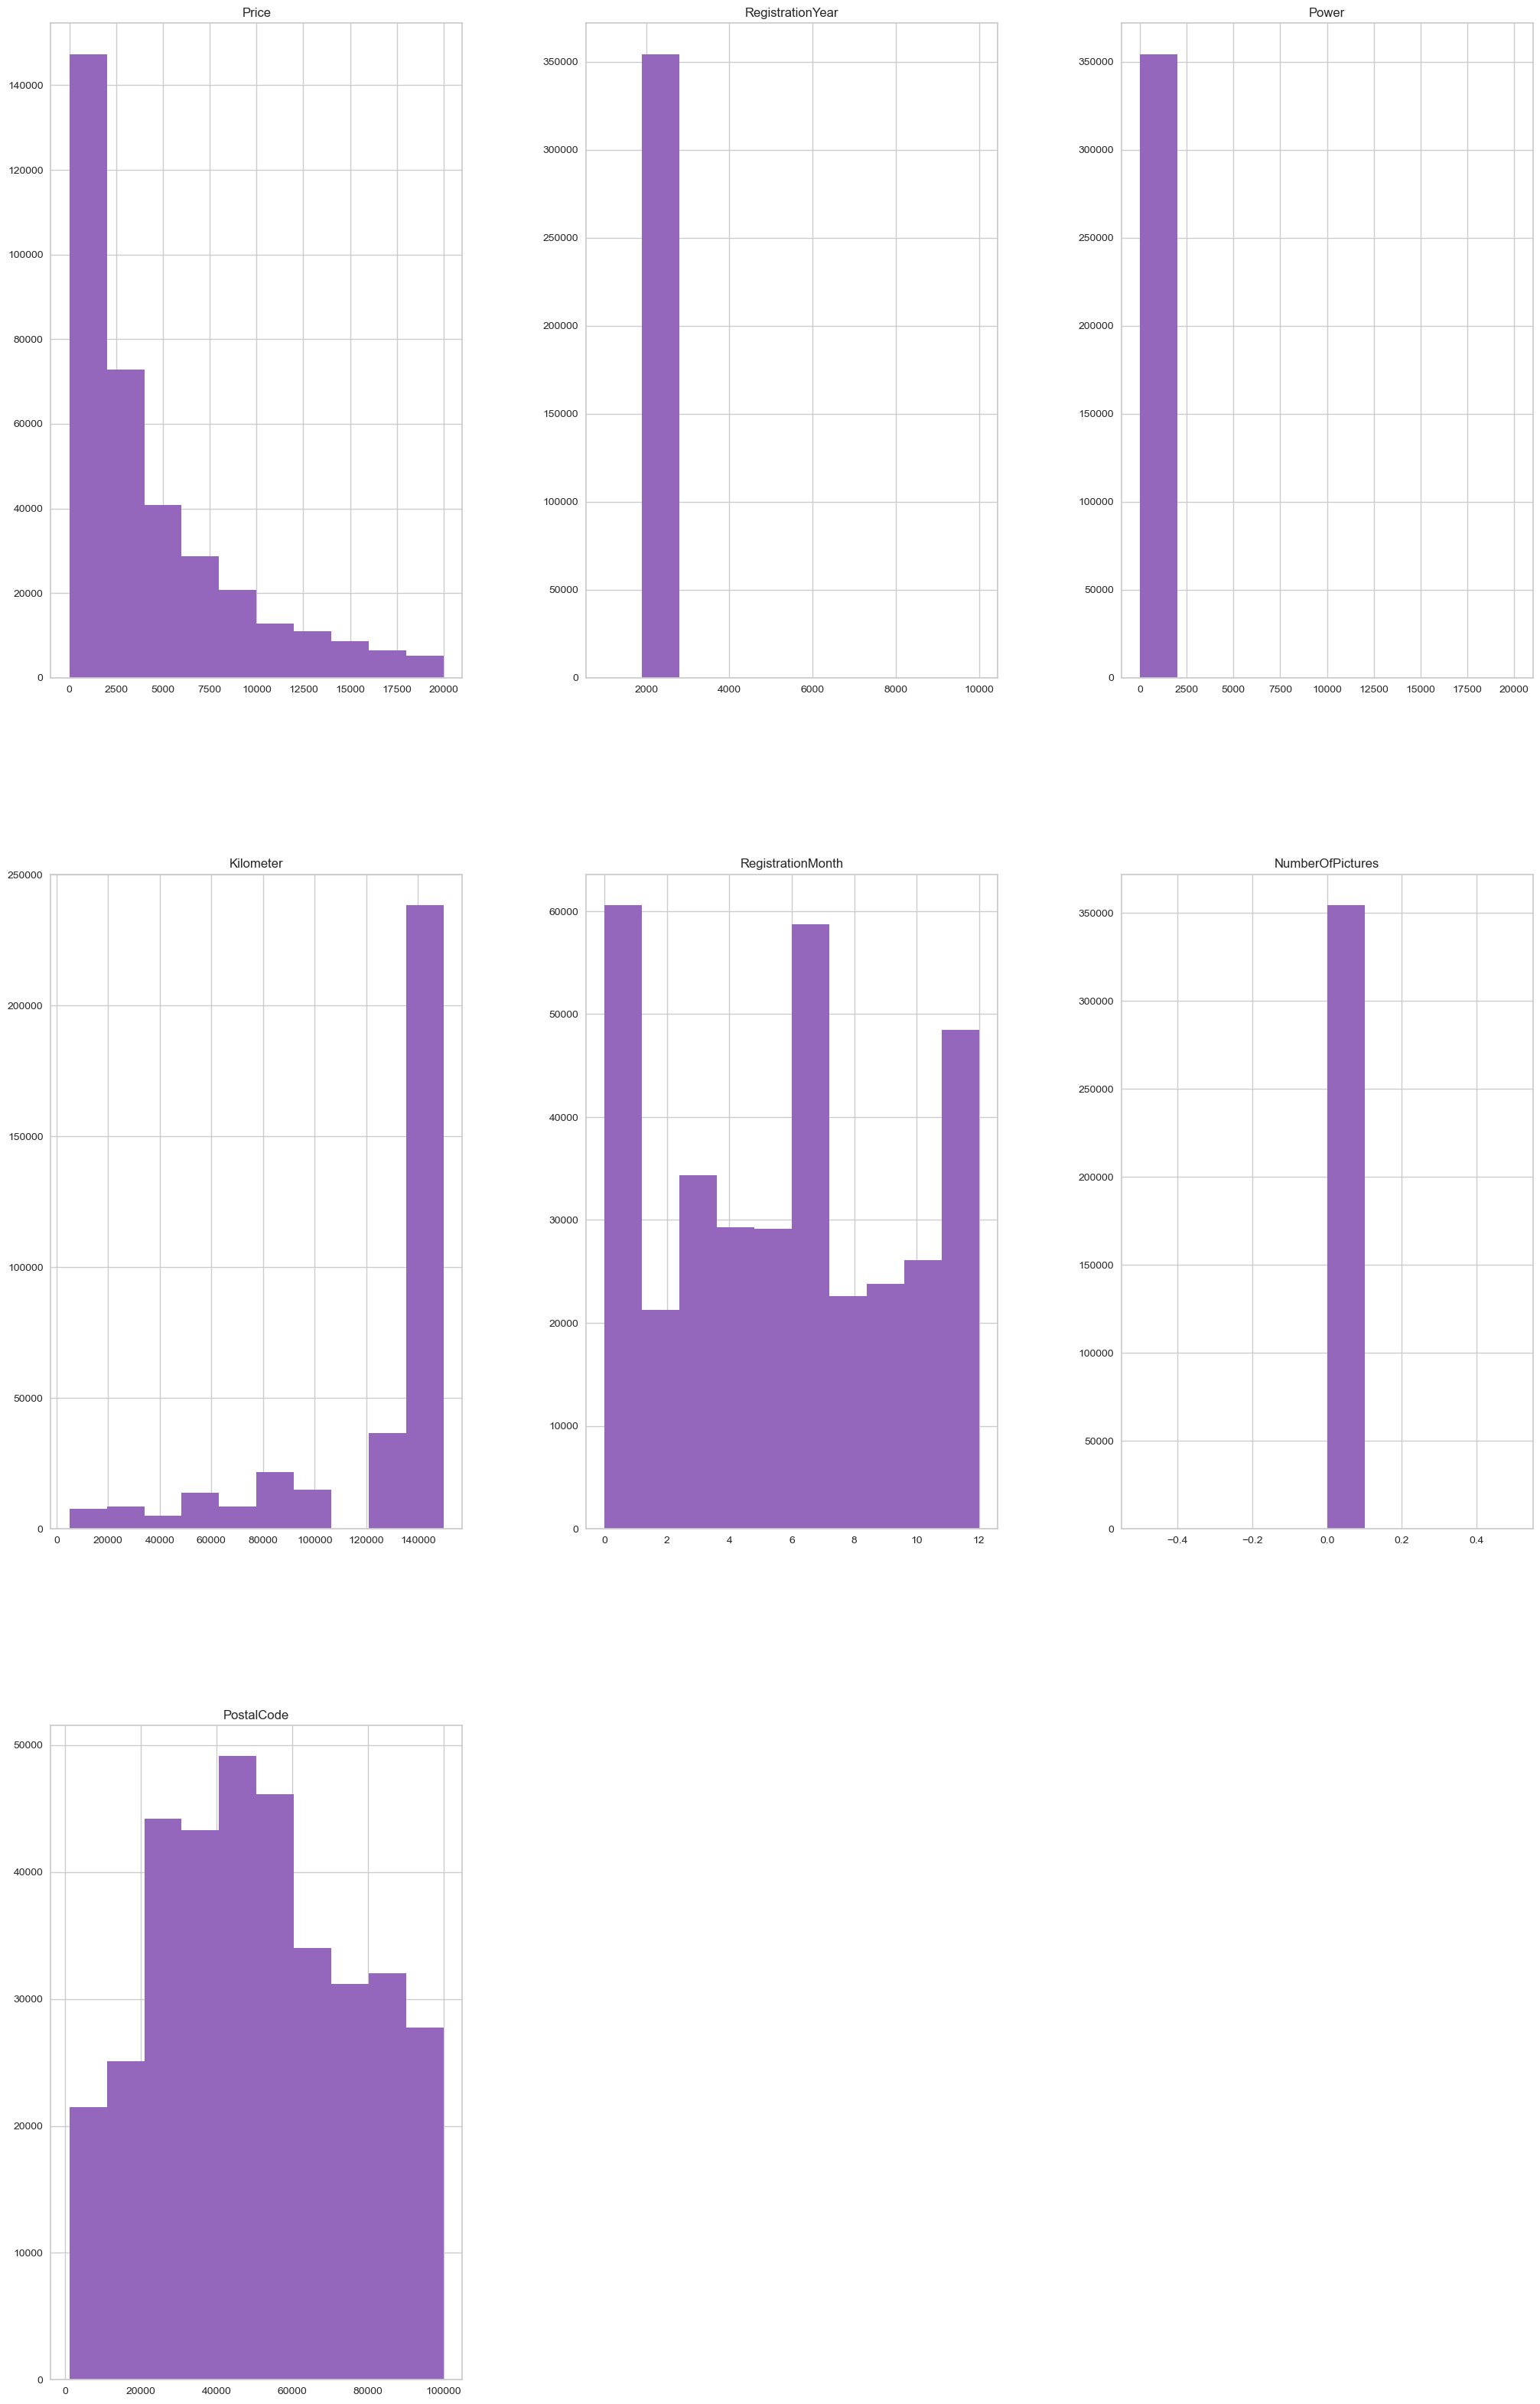

In [13]:
df.hist(figsize=(25, 40), color='tab:purple')#гистограммы признаков
plt.show()

### Выводы по итогу анализа данных:
1. Видим, что не приведены текстовые данные к нижнему регистру и наименования колонок не в змеином формате выполнены.
2. Мы имеем дело с датасетом, содержащим 354369 наблюдений. Данные содержат 16 признаков из которых: 9 - категориальных, 6 - числовых и 1  - булевые значения.
3. В данных имеются пропуски, а именно в колонках: vehicle type, gearbox, model, fuel type, repaired. С данными пропусками будет проведена работа по их удалению и(или) замене.
4. В колонках: number of pictures, price, power, registration month - tcnm ,есть большое количество '0'. Будем анализировать данные значения, по-возможности заменять.
5. В данных имеются дубликаты, которые следует удалить для последующего обучения моделей.
6. На основании анализа принимаем решение удалить признаки, которые не потребуются для последующей работы: number of pictures, postal code, date created, last seen, registration month, ~date crawled~.
7. В данных имеются аномальные значения, которые будут проанализированы.


Далее будет проведена предобработка данных.

## Предобработка данных
Текстовые данные приведем к нижнему регистру и наименования колонок представим в змеином формате. Удалим колонки не нужные для дальнейшей работы.

In [14]:
df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]

In [15]:

df = df.drop(['number_of_pictures', 'postal_code', 'date_created', \
              'last_seen', 'registration_month'], axis=1)

In [16]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'])

In [17]:
df['date_crawled'] = df.date_crawled.dt.strftime('%Y')

In [18]:
df['date_crawled'] = pd.to_numeric(df['date_crawled'])

In [19]:
df.dtypes

date_crawled          int64
price                 int64
vehicle_type         object
registration_year     int64
gearbox              object
power                 int64
model                object
kilometer             int64
fuel_type            object
brand                object
repaired             object
dtype: object

In [20]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,2016,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,2016,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,2016,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,2016,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,2016,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
354364,2016,0,NaN,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354365,2016,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
354366,2016,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,2016,9200,bus,1996,manual,102,transporter,150000,gasoline,volkswagen,no


### Обработка пропусков в данных
Посмотрим процент пропусков в колонках:

In [21]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date_crawled,0.000000
price,0.000000
vehicle_type,10.600000
registration_year,0.000000
gearbox,5.600000
power,0.000000
model,5.600000
kilometer,0.000000
fuel_type,9.300000
brand,0.000000


Удалим те строки, которые содержат пропуски во всех колонках, выделеных, как содержащие пропуски. Эти данные сложно будет восстановить.

In [22]:
num_rows = df.shape[0]#количество наблюдений до удаления строк

In [23]:
df = df.dropna(subset=['fuel_type', 'model', 'repaired','gearbox','vehicle_type'], how='all')

In [24]:
num_rows_2 = df.shape[0]#количество наблюдений после удаления строк

In [25]:
print(num_rows-num_rows_2)#количество удаленных строк

2237


Рассмотрим признак fuel type - тип топлива. 

In [26]:
df.fuel_type.value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

Petrol и Gasoline это два слова описывающих одно и тоже топливо, используемого в двигателе внутреннего сгорания. Petrol и Gasoline на самом деле одно и то же. Эти два слова имеют один и тот же смысл, а разница в них заключается в том, что они используются в разных странах. Petrol используется в Великобритании, Индии и некоторых других местах, в то время как Gasoline или Gas используется в Соединенных Штатах. Это и есть единственное различие между этими двумя терминами. Принимаем решение объединить данные.

In [27]:
df['fuel_type'] = df['fuel_type'].replace(['gasoline'],'petrol')

Так как в колонке есть значение 'other', то все неизвестные данные запишем в эту категорию.

In [28]:
df.fuel_type.fillna('other', inplace=True)

Рассмотрим признак vehicle type - тип автомобильного кузова.

In [29]:
df.vehicle_type.value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicle_type, dtype: int64

Здесь сложно каким-то образом распределить пропущенные данные по категориям. Так как в колонке есть значение 'other', то все неизвестные данные запишем в эту категорию.

In [30]:
df.vehicle_type.fillna('other', inplace=True)

Рассмотрим признак gearbox - тип коробки передач.

In [31]:
df.gearbox.value_counts()

manual    268251
auto       66285
Name: gearbox, dtype: int64

Сложно распределить пропущенные значения по категориям, создадим значение 'unknown' вместо пропусков.

In [32]:
df.gearbox.fillna('unknown', inplace=True)

Рассмотрим признак repaired - была машина в ремонте или нет. 

In [33]:
df.repaired.value_counts()

no     247161
yes     36054
Name: repaired, dtype: int64

Пропуски отнесем в категорию 'unknown'.

In [34]:
df.repaired.fillna('unknown', inplace=True)

Рассмотрим признак model - модель.

In [35]:
df.model.value_counts()

golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
i3                        8
serie_3                   4
rangerover                4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 250, dtype: int64

Пропуски отнесем к категории 'other'.

In [36]:
df.model.fillna('other', inplace=True)

In [37]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date_crawled,0.000000
price,0.000000
vehicle_type,0.000000
registration_year,0.000000
gearbox,0.000000
power,0.000000
model,0.000000
kilometer,0.000000
fuel_type,0.000000
brand,0.000000


Итоги обработки пропусков


Не большая часть данных была удалена - те данные которые содержани все пропуски в колонках с пропусками. Остальные пропуски были отмечены как 'other' или 'unknown'.

### Обработка аномальных значений

In [38]:
df.describe()

,date_crawled,price,registration_year,power,kilometer
count,352132.0,352132.000000,352132.000000,352132.000000,352132.000000
mean,2016.0,4437.540570,2003.871636,110.720108,128438.071519
std,0.0,4516.540446,70.673430,190.249667,37562.896848
min,2016.0,0.000000,1000.000000,0.000000,5000.000000
25%,2016.0,1100.000000,1999.000000,69.000000,125000.000000
50%,2016.0,2750.000000,2003.000000,105.000000,150000.000000
75%,2016.0,6450.000000,2008.000000,143.000000,150000.000000
max,2016.0,20000.000000,9999.000000,20000.000000,150000.000000


Рассмотрим распределение данных в колонке registration year - год регистрации автомобиля

In [39]:
df['registration_year'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1969, 1971, 1987, 1986, 1988,
       1965, 1970, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968, 1977,
       1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967, 1959,
       1956, 1000, 1941, 9999, 1500, 2200, 1962, 1929, 1957, 1940, 3000,
       2066, 1949, 2019, 1937, 1951, 1800, 1953, 8000, 9000, 2900, 6000,
       5900, 5911, 1933, 1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932,
       3700, 4800, 1942, 1935, 1234, 1936, 6500, 1923, 2290, 1930, 1001,
       9450, 1944, 7000, 2500, 1943, 1934, 1938, 1928, 1919, 5555, 1039,
       1300, 2800, 1931, 1915, 4500, 1920, 1602, 1111, 7800, 1947, 1927,
       7100, 8200, 1946, 7500, 3500, 1600])

Судя по данным из Википедии современного типа автомабили появились начиная с 1885 года. Посмотрим на срез с 1900 по 2022 год.

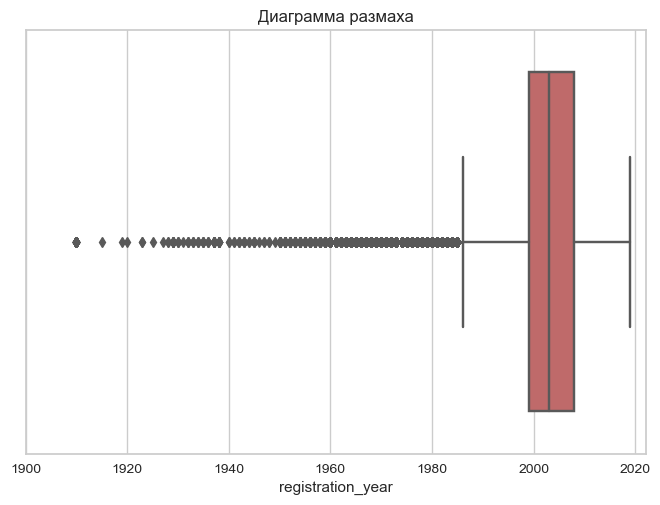

In [41]:
sns.boxplot(df['registration_year'], color='indianred')
plt.title('Диаграмма размаха')
plt.xlabel('registration_year')
plt.xlim(1900, 2022)
plt.show()

видим, что достаточно симметричное распределение, немного смещено влево. Можно предположить, что возможна продажа раритетных автомобилей пользователями сайта, оставим выбросы слева.

In [42]:
df.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,2016,480,other,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,2016,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes
2,2016,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknown
3,2016,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,2016,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no


In [43]:
df = df.loc[(df['registration_year'] <= 2022) & (df['registration_year'] >= 1980)]

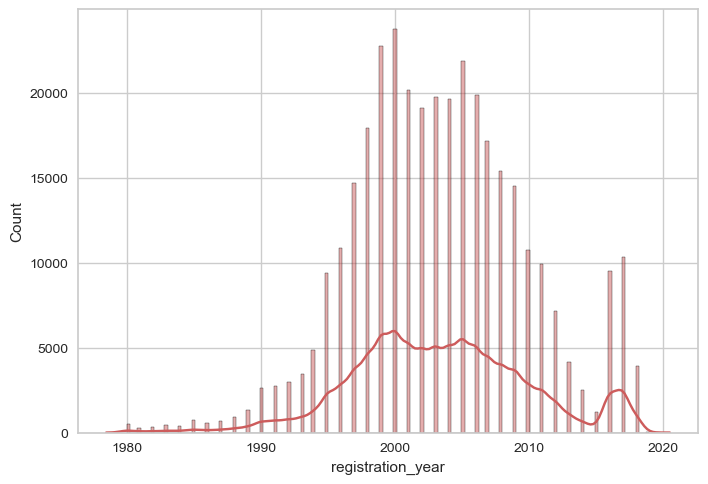

In [44]:
sns.histplot(
    df['registration_year'], kde=True,
    stat='count', kde_kws=dict(cut=3),
    color='indianred'
)
plt.show()

In [45]:
print(df.shape[0])

348766


In [46]:
df = df.loc[(df['registration_year'] < df['date_crawled'])]

In [47]:
print(df.shape[0])

324975


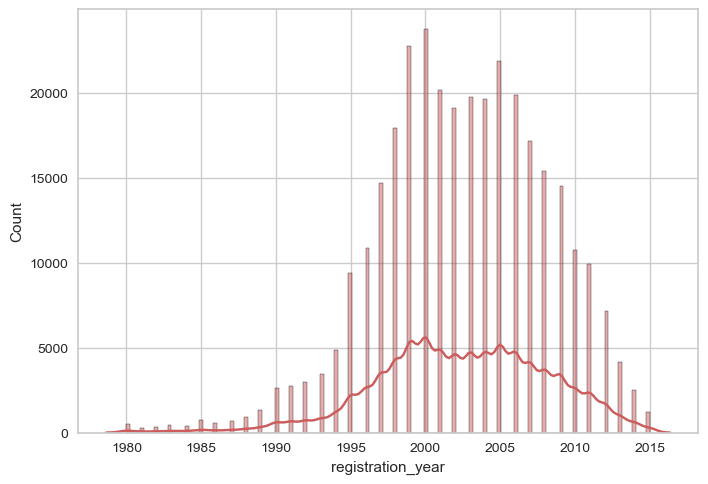

In [48]:
sns.histplot(
    df['registration_year'], kde=True,
    stat='count', kde_kws=dict(cut=3),
    color='indianred'
)
plt.show()

Рассмотрим аномалии в колонке power - мощность (л. с.).

In [49]:
df['power'].unique()

array([    0,   190,   163,    75,    69,   102,   109,    50,   125,
         101,   105,   140,   115,   131,   136,   160,   231,   118,
         193,    99,    60,   113,   218,   122,   129,    70,   306,
          95,    61,   177,   170,   143,   286,   232,   150,   156,
          80,    82,    90,   155,    54,   185,    87,   180,    86,
          84,   224,   235,   200,   178,   265,    77,   110,   144,
         120,   116,   184,   126,   204,    88,   194,    64,   305,
         197,   179,   250,    45,   313,    41,   165,    98,   130,
         114,   211,    56,   201,   213,    58,   107,   174,   100,
         220,    73,   192,    68,    66,   299,    74,    52,   147,
          71,    97,    65,   239,   203,     5,   300,   103,    85,
         258,   320,    63,    81,   148,    83,   145,    55,   230,
         280,   260,   104,   188,   333,   186,   117,   141,   132,
         234,   158,    39,    92,    51,   135,    53,   209,    43,
         146,    67,

Судя по данным о спортивных автомобилях, то их мощность может быть более 1000, максимальное значение мощности, которое удалось найти  -  1400 л.с. Предположим, что очень уникальные - более 1000 л.с. мощностью могут продаваться на данном портале, но если мы взглянем на максимальное значение стоимости, то поймем, что это не стоимость за спорткар. Зададим предел по мощности до 400 л.c.. Минимальная мощность возможна от 5 л.c.(например Renault Twizy). Рассмотрим распределение по мощности в пределах от 0 до 400 л.c.

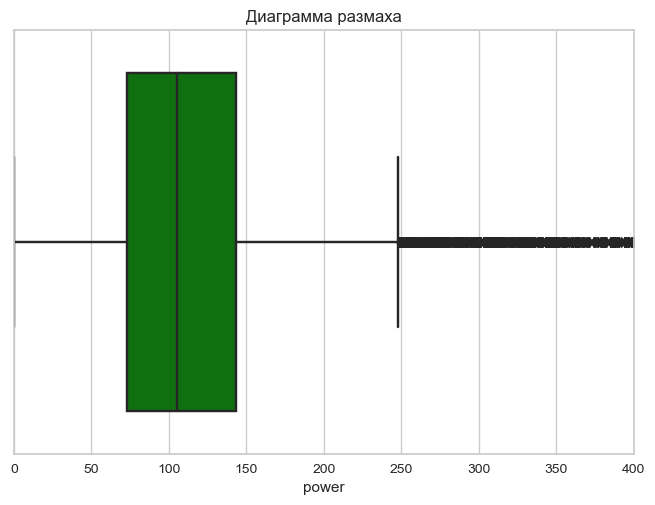

In [50]:
# построим диаграмму размаха
sns.boxplot(df['power'], color='green')
plt.title('Диаграмма размаха')
plt.xlabel('power')
plt.xlim(0, 400)
plt.show()

Удалим данные с мощностью более 400(л.с.).

In [51]:
df = df.loc[df['power'] <= 400]

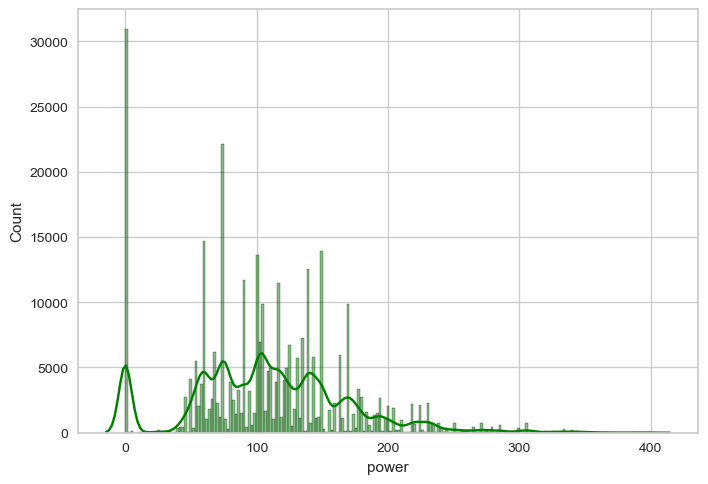

In [52]:
sns.histplot(
    df['power'], kde=True,
    stat='count', kde_kws=dict(cut=3),
    color='green'
)
plt.show()

Проанализируем нулевые значения.

In [53]:
sum(df['power'] == 0)

30877

In [54]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,2016,480,other,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,2016,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes
2,2016,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknown
3,2016,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,2016,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
354363,2016,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no
354364,2016,0,other,2005,manual,0,colt,150000,petrol,mitsubishi,yes
354366,2016,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
354367,2016,9200,bus,1996,manual,102,transporter,150000,petrol,volkswagen,no


In [56]:
res = df.groupby(['model', 'registration_year', 
                  'brand'])['power'].apply(lambda row: np.median([x for x in row if x!=0])).reset_index()

In [57]:
res = df.groupby(['model', 'registration_year', 'brand']
                )['power'].apply(lambda row: np.median([x for x in row if x!=0])).reset_index()

In [58]:
df = pd.merge(df, res, on=['model', 'registration_year', 'brand'], how='left', suffixes=('', '_median'))

In [59]:
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired,power_median
0,2016,480,other,1993,manual,0,golf,150000,petrol,volkswagen,unknown,75.0
1,2016,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes,140.0
2,2016,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknown,163.0
3,2016,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,101.0
4,2016,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...
324317,2016,1150,bus,2000,manual,0,zafira,150000,petrol,opel,no,116.0
324318,2016,0,other,2005,manual,0,colt,150000,petrol,mitsubishi,yes,95.0
324319,2016,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no,54.0
324320,2016,9200,bus,1996,manual,102,transporter,150000,petrol,volkswagen,no,102.0


In [60]:
df.loc[df['power'] == 0, 'power'] = df['power_median']
df.drop('power_median', 1, inplace=True)
df.loc[df['power'].isna(), 'power'] = df['power'].dropna().median()#оставшиеся пропуски заменяем медианой
df

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,2016,480,other,1993,manual,75.0,golf,150000,petrol,volkswagen,unknown
1,2016,18300,coupe,2011,manual,190.0,other,125000,petrol,audi,yes
2,2016,9800,suv,2004,auto,163.0,grand,125000,petrol,jeep,unknown
3,2016,1500,small,2001,manual,75.0,golf,150000,petrol,volkswagen,no
4,2016,3600,small,2008,manual,69.0,fabia,90000,petrol,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
324317,2016,1150,bus,2000,manual,116.0,zafira,150000,petrol,opel,no
324318,2016,0,other,2005,manual,95.0,colt,150000,petrol,mitsubishi,yes
324319,2016,1199,convertible,2000,auto,101.0,fortwo,125000,petrol,smart,no
324320,2016,9200,bus,1996,manual,102.0,transporter,150000,petrol,volkswagen,no


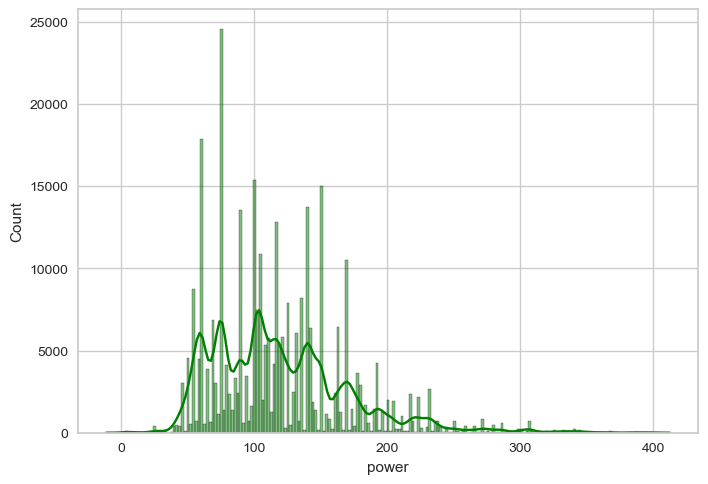

In [62]:
sns.histplot(
    df['power'], kde=True,
    stat='count', kde_kws=dict(cut=3),
    color='green'
)
plt.show()

Рассмотрим аномалии в колонке price - цена.

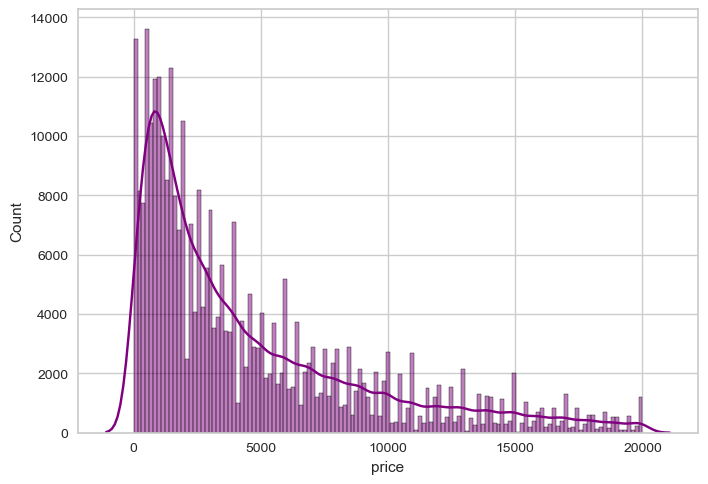

In [63]:
sns.histplot(
    df['price'], kde=True,
    stat='count', kde_kws=dict(cut=3),
    color='purple'
)
plt.show()

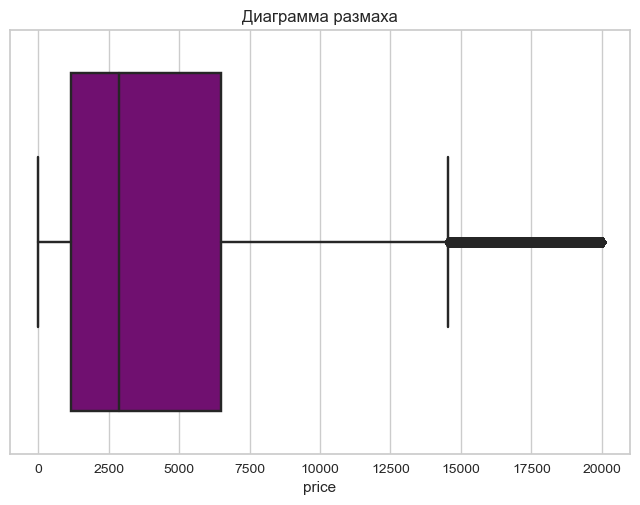

In [64]:
sns.boxplot(df['price'], color='purple')
plt.title('Диаграмма размаха')
plt.xlabel('price')
plt.show()

Удалим нулевые значения, сложно заменить их.

In [65]:
df = df.loc[df['price'] > 0]

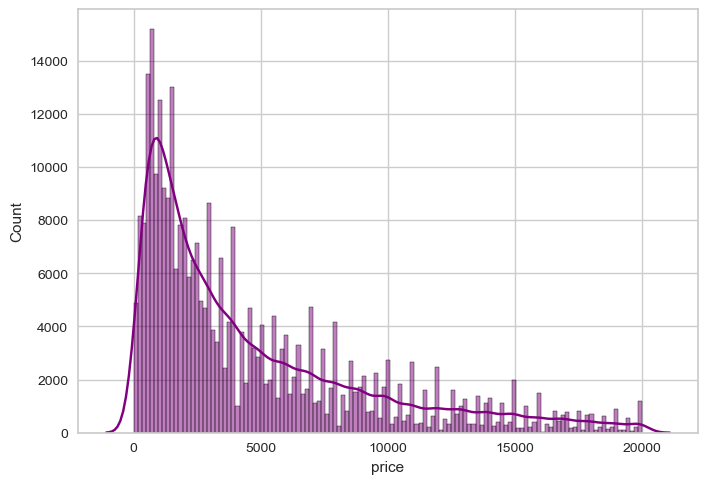

In [66]:
sns.histplot(
    df['price'], kde=True,
    stat='count', kde_kws=dict(cut=3),
    color='purple'
)
plt.show()

In [67]:
df.describe()

,date_crawled,price,registration_year,power,kilometer
count,315860.0,315860.000000,315860.000000,315860.000000,315860.000000
mean,2016.0,4649.379690,2002.554097,119.397550,128570.885835
std,0.0,4536.583562,5.684155,51.880948,36953.230755
min,2016.0,1.000000,1980.000000,1.000000,5000.000000
25%,2016.0,1250.000000,1999.000000,75.000000,125000.000000
50%,2016.0,2990.000000,2003.000000,110.000000,150000.000000
75%,2016.0,6700.000000,2007.000000,147.000000,150000.000000
max,2016.0,20000.000000,2015.000000,400.000000,150000.000000


В итоге работы с аномальными значениями мы избавились от явных аномалий, но есть вопросы к качеству сбора и обработки данных от пользователей сайта.

Проверим наличие дубликатов.

In [68]:
df.duplicated().sum()

44031

Удалм дубликаты и перезапишем индексы.

In [69]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [70]:
len(df)

271829

### Итоги предобработки данных
Часть данных была удалена - те данные которые содержани все пропуски в колонках: fuel_type, model, repaired, gearbox, vehicle_type. Остальные пропуски были отмечены как 'other' или 'unknown', так как их трудно было восстановить.


В колонке registration_year - год регистрации автомобиля данные ограничены с 1900 по 2022. В колонке power - мощность (л. с.) были удалены все значения мощностью превышающей 400л.с., значения менее 5 - были заменены на медиану. В колонке price - цена были удалены все значения менее 0.


Было удалено 43880 дубликатов.


В результате работы с пропусками и аномальными значениями у нас 294395 наблюдений для обучения моделей. Приступаем к обучению моделей.


## Обучение моделей

In [190]:
from sklearn.model_selection import train_test_split

X, y = df.drop('price', 1), df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(217463, 10)
(54366, 10)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271829 entries, 0 to 271828
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date_crawled       271829 non-null  int64  
 1   price              271829 non-null  int64  
 2   vehicle_type       271829 non-null  object 
 3   registration_year  271829 non-null  int64  
 4   gearbox            271829 non-null  object 
 5   power              271829 non-null  float64
 6   model              271829 non-null  object 
 7   kilometer          271829 non-null  int64  
 8   fuel_type          271829 non-null  object 
 9   brand              271829 non-null  object 
 10  repaired           271829 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 22.8+ MB


In [73]:
NUMERIC_FEATURES = ['date_crawled', 'registration_year', 'power', 'kilometer']
CATEGORICAL_FEATURES = [feat for feat in X.columns if feat not in NUMERIC_FEATURES]

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [75]:

linear_pipeline = Pipeline(
    [('preprocessing', make_column_transformer(
        (
            OneHotEncoder(drop='first', handle_unknown='ignore'),
            CATEGORICAL_FEATURES
        ),
        (
            StandardScaler(), 
            NUMERIC_FEATURES
        ),
        remainder='passthrough',
        verbose_feature_names_out=False
    )),
    ('model', GridSearchCV(LinearRegression(n_jobs=-1), param_grid={'normalize':[True,False]},scoring='neg_mean_squared_error'))]
)

catboost_pipeline = Pipeline(
    [('model', GridSearchCV(CatBoostRegressor(cat_features=CATEGORICAL_FEATURES,
                                              random_state=42), param_grid={'learning_rate': [0.03, 0.1],
                                                                                             'depth': [4, 6, 10]},
                            scoring='neg_mean_squared_error'))]
)

lgb_pipeline = Pipeline(
    [('preprocessing', make_column_transformer(
            (
                OrdinalEncoder(),
                CATEGORICAL_FEATURES
            ),
            (
                StandardScaler(), 
                NUMERIC_FEATURES
            ),
            remainder='passthrough',
            verbose_feature_names_out=False
    )),
    ('model', GridSearchCV(lgb.LGBMRegressor(n_jobs=-1,random_state=42), param_grid = {'learning_rate': [0.01, 0.1, 1],
                                                                       'n_estimators': [20, 40]},
                           scoring='neg_mean_squared_error'))]
)

tree_pipeline = Pipeline(
    [('preprocessing', make_column_transformer(
        (
            OrdinalEncoder(),
            CATEGORICAL_FEATURES
        ),
        (
            StandardScaler(), 
            NUMERIC_FEATURES
        ),
        remainder='passthrough',
        verbose_feature_names_out=False
    )),
    ('model', GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid={"splitter":["best","random"],
                                                                "max_depth" : [1,3,5,7,9,11,12]},
                           scoring='neg_mean_squared_error'))]
)

### Модель Линейной регрессии

In [76]:
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['date_crawled',
                                                   'registration_year', 'power',
                                                   'kilometer'])],
                                   verbose_feature_names_out=False)),
                ('model',

In [77]:
rmse = np.sqrt(-linear_pipeline[1].best_score_)
print(rmse)

2454.897901471396


In [78]:
linear_pipeline[1].best_params_

{'normalize': False}

### Дерево принятия решений

In [79]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['date_crawled',
                                                   'registration_year', 'power',
                                                   'kilometer'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                  

In [80]:
rmse = np.sqrt(-tree_pipeline[1].best_score_)
print(rmse)

1912.2259486342641


In [81]:
tree_pipeline[1].best_params_

{'max_depth': 12, 'splitter': 'best'}

### Модель CatBoost

In [82]:
catboost_pipeline.fit(X_train, y_train)

0:	learn: 4508.1322901	total: 95.8ms	remaining: 1m 35s
1:	learn: 4422.1908922	total: 125ms	remaining: 1m 2s
2:	learn: 4339.0421300	total: 153ms	remaining: 50.9s
3:	learn: 4259.6044945	total: 174ms	remaining: 43.3s
4:	learn: 4183.0963932	total: 199ms	remaining: 39.6s
5:	learn: 4109.2341890	total: 220ms	remaining: 36.5s
6:	learn: 4038.3700954	total: 244ms	remaining: 34.6s
7:	learn: 3970.1076046	total: 264ms	remaining: 32.7s
8:	learn: 3904.1351581	total: 286ms	remaining: 31.4s
9:	learn: 3841.2184135	total: 315ms	remaining: 31.2s
10:	learn: 3781.3359977	total: 335ms	remaining: 30.1s
11:	learn: 3722.6032590	total: 358ms	remaining: 29.4s
12:	learn: 3665.0135877	total: 379ms	remaining: 28.8s
13:	learn: 3609.0838733	total: 399ms	remaining: 28.1s
14:	learn: 3557.0063984	total: 420ms	remaining: 27.5s
15:	learn: 3506.6851296	total: 441ms	remaining: 27.1s
16:	learn: 3458.0297343	total: 464ms	remaining: 26.8s
17:	learn: 3411.7561953	total: 485ms	remaining: 26.5s
18:	learn: 3365.8330389	total: 512ms

Pipeline(steps=[('model',
                 GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7f7a08b9d970>,
                              param_grid={'depth': [4, 6, 10],
                                          'learning_rate': [0.03, 0.1]},
                              scoring='neg_mean_squared_error'))])

In [83]:
rmse = np.sqrt(-catboost_pipeline[0].best_score_)
print(rmse)

1565.539988244243


In [84]:
catboost_pipeline[0].best_params_

{'depth': 10, 'learning_rate': 0.1}

### Модель LGBMRegressor

In [85]:
lgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['date_crawled',
                                                   'registration_year', 'power',
                                                   'kilometer'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 GridSearchCV(estimator=LGBMRegressor(random_state=42),
                          

In [86]:
rmse = np.sqrt(-lgb_pipeline[1].best_score_)
print(rmse)

1720.3756387145556


In [87]:
lgb_pipeline[1].best_params_

{'learning_rate': 1, 'n_estimators': 40}

In [138]:
models_rmse = [["модель Линейная регрессия", "2454.89"],
               ["модель Сatboost", "1565.53"],
               ["модель Дерево принятия решения", "1912.22"],
               ["модель LightGBM", "1720.37"]]
data= pd.DataFrame(models_rmse, columns=["модель","RMSE"])
data = data.set_index("модель")
data.index.names = [None]
data.sort_values("RMSE")

,RMSE
модель Сatboost,1565.53
модель LightGBM,1720.37
модель Дерево принятия решения,1912.22
модель Линейная регрессия,2454.89


### Итоги обучения моделей
Лучше всего справилась с предсказанием модель CatBoost RMSE = 1565.53. Худший результат у модели Линейной регрессии RMSE = 2454.89.

Далее будет проведен анализ скорости обучения моделей и скорости предсказания.

## Анализ моделей

Модель линейной регрессии

In [160]:
linear_pipeline_final = Pipeline(
    [('preprocessing', make_column_transformer(
        (
            OneHotEncoder(drop='first', handle_unknown='ignore'),
            CATEGORICAL_FEATURES
        ),
        (
            StandardScaler(), 
            NUMERIC_FEATURES
        ),
        remainder='passthrough',
        verbose_feature_names_out=False
    )),
    ('model', LinearRegression(n_jobs=-1, normalize=False))])

In [161]:
%%time
# найдем время обучения модели
print("Время обучения модели Линейной регрессии")
linear_pipeline_final.fit(X_train, y_train)

Время обучения модели Линейной регрессии
CPU times: user 18.3 s, sys: 5.07 s, total: 23.4 s
Wall time: 5.51 s


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['date_crawled',
                                                   'registration_year', 'power',
                                                   'kilometer'])],
                                   verbose_feature_names_out=False)),
                ('model',

In [162]:
%%time
# найдем время предсказания модели
print("Время предсказания модели Линейной регрессии")
y_pred = linear_pipeline_final.predict(X_test)


Время предсказания модели Линейной регрессии
CPU times: user 290 ms, sys: 90.8 ms, total: 381 ms
Wall time: 86.4 ms


CatBoost

In [165]:
catboost_pipeline_final = Pipeline(
    [('model', CatBoostRegressor(cat_features=CATEGORICAL_FEATURES,
                                 random_state=42, depth=10, learning_rate=0.1))])

In [166]:
%%time
# найдем время обучения модели
print("Время обучения модели catboost")
catboost_pipeline_final.fit(X_train, y_train)

Время обучения модели catboost
0:	learn: 4252.9468571	total: 76.4ms	remaining: 1m 16s
1:	learn: 3947.6822854	total: 150ms	remaining: 1m 15s
2:	learn: 3675.7198426	total: 224ms	remaining: 1m 14s
3:	learn: 3440.8021814	total: 296ms	remaining: 1m 13s
4:	learn: 3232.6051296	total: 363ms	remaining: 1m 12s
5:	learn: 3049.1584136	total: 433ms	remaining: 1m 11s
6:	learn: 2885.6773767	total: 497ms	remaining: 1m 10s
7:	learn: 2743.8897317	total: 556ms	remaining: 1m 8s
8:	learn: 2617.0214021	total: 619ms	remaining: 1m 8s
9:	learn: 2512.4862068	total: 684ms	remaining: 1m 7s
10:	learn: 2419.3460986	total: 751ms	remaining: 1m 7s
11:	learn: 2336.9169706	total: 843ms	remaining: 1m 9s
12:	learn: 2263.9686771	total: 907ms	remaining: 1m 8s
13:	learn: 2203.5513651	total: 986ms	remaining: 1m 9s
14:	learn: 2150.7022094	total: 1.05s	remaining: 1m 8s
15:	learn: 2101.6745600	total: 1.1s	remaining: 1m 7s
16:	learn: 2061.4330883	total: 1.16s	remaining: 1m 7s
17:	learn: 2025.4530682	total: 1.22s	remaining: 1m 6s


Pipeline(steps=[('model',
                 <catboost.core.CatBoostRegressor object at 0x7f7a674cdcd0>)])

In [167]:
%%time
# найдем время предсказания модели
print("Время предсказания модели catboost")
y_pred = catboost_pipeline_final.predict(X_test)

Время предсказания модели catboost
CPU times: user 784 ms, sys: 8.5 ms, total: 793 ms
Wall time: 143 ms


Модель дерева принятия решений

In [170]:
tree_pipeline_final = Pipeline(
    [('preprocessing', make_column_transformer(
        (
            OrdinalEncoder(),
            CATEGORICAL_FEATURES
        ),
        (
            StandardScaler(), 
            NUMERIC_FEATURES
        ),
        remainder='passthrough',
        verbose_feature_names_out=False
    )),
    ('model', DecisionTreeRegressor(random_state=42, max_depth=12, splitter='best'))]
)

In [171]:
%%time
# найдем время обучения модели
print("Время обучения модели Дерева принятия решений")
tree_pipeline_final.fit(X_train, y_train)

Время обучения модели Дерева принятия решений
CPU times: user 538 ms, sys: 3.83 ms, total: 542 ms
Wall time: 540 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['date_crawled',
                                                   'registration_year', 'power',
                                                   'kilometer'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 DecisionTreeRegressor(max_depth=12, random_state=42))])

In [172]:
%%time
# найдем время предсказания модели
print("Время обучения модели Дерева принятия решений")
y_pred = tree_pipeline_final.predict(X_test)

Время обучения модели Дерева принятия решений
CPU times: user 55.7 ms, sys: 1.36 ms, total: 57.1 ms
Wall time: 55.9 ms


Модель LightGBM

In [177]:
lgb_pipeline_final = Pipeline(
    [('preprocessing', make_column_transformer(
            (
                OrdinalEncoder(),
                CATEGORICAL_FEATURES
            ),
            (
                StandardScaler(), 
                NUMERIC_FEATURES
            ),
            remainder='passthrough',
            verbose_feature_names_out=False
    )),
    ('model', lgb.LGBMRegressor(n_jobs=-1,random_state=42,learning_rate=1, n_estimators=40))]
)

In [178]:
%%time
# найдем время обучения модели
print("Время обучения модели LGBMRegressor")
lgb_pipeline_final.fit(X_train, y_train)

Время обучения модели LGBMRegressor
CPU times: user 2.65 s, sys: 419 ms, total: 3.07 s
Wall time: 765 ms


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['date_crawled',
                                                   'registration_year', 'power',
                                                   'kilometer'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 LGBMRegressor(learning_rate=1, n_estimators=40,
                               ra

In [179]:
%%time
# найдем время предсказания модели
print("Время обучения модели LGBMRegressor")
y_pred = lgb_pipeline_final.predict(X_test)

Время обучения модели LGBMRegressor
CPU times: user 282 ms, sys: 35.6 ms, total: 318 ms
Wall time: 83.5 ms


Посмотрим финальную метрику для модели CatBoostRegressor

In [189]:
print("rmse")
np.sqrt(mean_squared_error(y_pred, y_test))


rmse


1737.3345698508667

In [184]:
models_learn = [["линейная регрессия: обучение", "26,4 s", "5.51 s"],
                ["catboost: обучение", "8 min 31 s", "13 s"],
                ["дерево принятия решения: обучение", "542 ms", "540 ms"],
                ["LightGBM: обучение", "3,07 s", "765 ms"]]
data_3= pd.DataFrame(models_learn, columns=["модель","CPU-times", "Wall time"])
data_3 = data_3.set_index("модель")
data_3.index.names = [None]
data_3

,CPU-times,Wall time
линейная регрессия: обучение,"26,4 s",5.51 s
catboost: обучение,8 min 31 s,13 s
дерево принятия решения: обучение,542 ms,540 ms
LightGBM: обучение,"3,07 s",765 ms


In [185]:
models_predict = [["линейная регрессия: предсказание", "381 ms", "86.4 ms"],
                  ["catboost: предсказание", "793 ms", "143 ms"],
                  ["дерево принятия решения: предсказание", "57.1 ms", "55.9 ms"],
                  ["LightGBM: предсказание", "318 s", "83.5 s"]]
data_2= pd.DataFrame(models_predict, columns=["модель","CPU-times", "Wall time"])
data_2 = data_2.set_index('модель')
data_2.index.names = [None]
data_2

,CPU-times,Wall time
линейная регрессия: предсказание,381 ms,86.4 ms
catboost: предсказание,793 ms,143 ms
дерево принятия решения: предсказание,57.1 ms,55.9 ms
LightGBM: предсказание,318 s,83.5 s


### Итоги анализа моделей
Дольше всего учится модель catboost: 8 min 31 s. Дольше всех предсказывает модель LightGBM 3,07 s. Значение rmse мы получили самые высокие для этих моделей. Быстрее всех обучается и предсказывает модель Дерева принятия решений, но значение rmse достаточно низкое.

Больше всего соответствует требованиям заказчика модель catboost, которая обладает чуть менее точным качеством предсказания, так и одной из самых быстрых скорости обучения и предсказания.

## Общий вывод

Нами были получены данные, в которых:
1) были не приведены текстовые данные к нижнему регистру и наименования колонок не в змеином формате выполнены.
2) было 354369 наблюдений. Данные содержали 16 признаков из которых: 9 - категориальных, 6 - числовых и 1  - булевые значения.
3) имелись пропуски, а именно в колонках: vehicle type, gearbox, model, fuel type, repaired.
4) в колонках: number of pictures, price, power, registration month - tcnm ,было большое количество '0'. 
5) в части сильной корреляции, увидили ее между признаками vehicle type и registration year. Для модели линейной регрессии это плохо, но помимо модели линейной регрессии были рассмотрены и иные модели, поэтому, оставили эти признаки в датасете для обучения моделей. 
6) имелись дубликаты.
7) Было принято решение удалить признаки, которые не потребуются для последующей работы: number of pictures, postal code, date created, last seen, registration month, date crawled.
8) были обнаружены аномальные значения.


В результате предобработки данных:


Часть данных была удалена - те данные которые содержани все пропуски в колонках: fuel_type, model, repaired, gearbox, vehicle_type. Остальные пропуски были отмечены как 'other' или 'unknown', так как их трудно было восстановить.


В колонке registration_year - год регистрации автомобиля, данные ,были ограничены с 1900 по 2022. В колонке power - мощность (л. с.) были удалены все значения мощностью превышающей 400л.с., значения равные 0 - были заменены на медиану среди схожих автомобилей или заменены медианой. В колонке price - цена были удалены все значения менее 0.


Было удалено 43880 дубликатов.


В результате получили 294395 наблюдений для обучения моделей.


Было обучено 5 моделей обучения моделей
Лучше всего справилась с предсказанием модель CatBoost RMSE = 1565.53. Худший результат у модели Линейной регрессии RMSE = 2454.89.

In [186]:
data.sort_values("RMSE")

,RMSE
модель Сatboost,1565.53
модель LightGBM,1720.37
модель Дерево принятия решения,1912.22
модель Линейная регрессия,2454.89


В результате анализа моделей было установлено:


Дольше всего учится модель catboost: 8 min 31 s. Дольше всех предсказывает модель LightGBM 3,07 s. Значение rmse мы получили самые высокие для этих моделей. Быстрее всех обучается и предсказывает модель Дерева принятия решений, но значение rmse достаточно низкое.

Больше всего соответствует требованиям заказчика модель catboost, которая обладает высоким качеством предсказания, но не самымой высокой скоросью обучения и предсказания.

In [187]:
data_2

,CPU-times,Wall time
линейная регрессия: предсказание,381 ms,86.4 ms
catboost: предсказание,793 ms,143 ms
дерево принятия решения: предсказание,57.1 ms,55.9 ms
LightGBM: предсказание,318 s,83.5 s


In [188]:
data_3

,CPU-times,Wall time
линейная регрессия: обучение,"26,4 s",5.51 s
catboost: обучение,8 min 31 s,13 s
дерево принятия решения: обучение,542 ms,540 ms
LightGBM: обучение,"3,07 s",765 ms


Больше всего соответствует требованиям заказчика модель catboost, которая обладает  высоким качеством предсказания (на тесте 1737.33), так является и одной из самых быстрых по скорости предсказания, но у модели  catboost самая малелькая скоростью обучения. Заказчик может обратить внимание и на модель LightGBM, которая чуть хуже предсказывает и дольше предсказывает, но достаточно быстро обучается.